In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


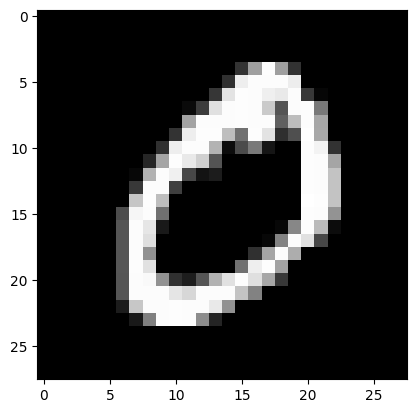

In [3]:
sample = 1
image = X_train[sample]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
num = 10
images = X_train[:num]
labels = y_train[:num]

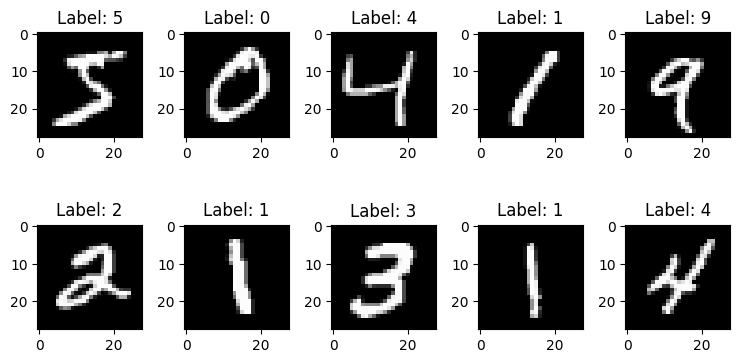

In [5]:
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
x_train_flattened = X_train.reshape(X_train.shape[0], -1) / 255.0
x_test_flattened = X_test.reshape(X_test.shape[0], -1) / 255.0

In [7]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(x_train_flattened)
y_kmeans = kmeans.predict(x_test_flattened)

In [8]:
print("Cluster centers:", kmeans.cluster_centers_)

Cluster centers: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print("Cluster centers:", kmeans.cluster_centers_)

Cluster centers: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.39922380e-05  1.83914038e-04  3.21872520e-20 -6.35274710e-21
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.24937360e-20  5.79256814e-06  4.03307556e-04  1.00645871e-03
   1.69722246e-03  2.22579431e-03  3.07295740e-03  3.61094216e-03
   3.00344658e-03  1.71677238e-03  1.15489327e-03  2.09980595e-04
   1.83189967e-04  4.99609002e-05 -2.33103467e-18  2.76471554e-18
   1.73472348e-18  5.69206141e-19  1.69406589e-19 -4.74338450e-20
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  4.99749439e-20  2.244637

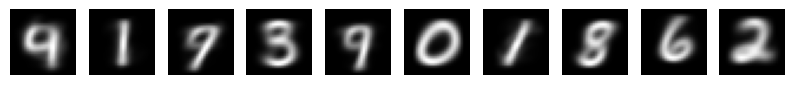

In [10]:
fig, axes = plt.subplots(1, num_clusters, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_test_flattened, y_kmeans)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0586


In [12]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
ari = adjusted_rand_score(y_test, y_kmeans)
nmi = normalized_mutual_info_score(y_test, y_kmeans)
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")

Adjusted Rand Index: 0.3667
Normalized Mutual Information: 0.4926
